In [1]:
import graphviz
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("titanic-passengers.csv", sep=";")
data = data.drop("Cabin",axis = 1)


In [2]:
data.isnull().sum()
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Survived"] = data["Survived"].replace({"No":0,"Yes":1})
data["Sex"] = data["Sex"].replace({"male":0,"female":1})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,S


In [3]:
d = data.drop(["Survived","Name","Ticket","Age","Embarked"],axis = 1)
y = data["Survived"]
x_train,x_test,y_train,y_test = train_test_split(d,y, test_size = 0.4)
tree_xy = DecisionTreeClassifier(criterion ="gini",splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5)
tree_xy.fit(x_train,y_train)
prediction = tree_xy.predict(x_test)
print("Accuracy : ", accuracy_score(y_test,prediction))

Accuracy :  0.7759103641456583


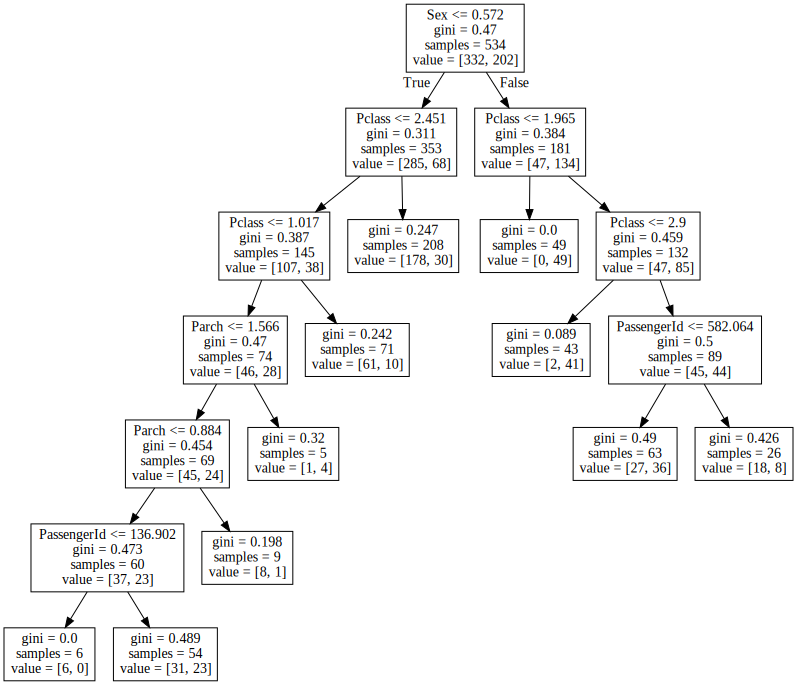

In [4]:
graph_export = tree.export_graphviz(tree_xy,feature_names=d.columns)
graph = graphviz.Source(graph_export)
graph.render("data")
print()
graph

<font color = "red" size = "3"> Interpretation </font>

Informations which we can notice via the Decision Tree :

   - Out of 534 the persons in the trainingSets 353 (285 of them survived and 68 didn't survive (The probabilty of missclafying is about 0.311 )) were mens and 181 were womens (47 of them survived and 134 didn't survive (The probability of missclafying is about 0.384)) (See first Internal Note) and out of all of them only 332 survived (The probability of missclafying is about 0.47).
   
   - Out of these 353 mens 208 lived in third Pclass (178 of them survived and 30 didn't survive (The probability of missclafying is about 0.247)), 71 lived in the second Pclass (61 of them Survived and 10 didn't surive (The probability of missclafying is about 0.242)) and 74 lived in the first Pclass (46 of them survived and 28 didn't Survive (The probability of missclafying is about 0.47))
   
   - Out of the 74 mens who lived in the first Pclass 69 of them had Parch less than 1.566 (45 of them survived and 24 didn't surive(The probability of missclafying is about 0.454)) and 5 didn't (Only one of them survived (The probability of missclafying is about 0.32))
   
   - Out of the 69 mens who lived in the first Pclass and had a Parch less than 1.566, 60 had a Parch less than 0.884 (37 of them survived and 23 didn't survive (The probabilty of missclafying is about 0.473)) and 9 didn't (Only one of them didn't survive (The probability of missclafying is 0.198))
   
   - Out of the 60 mens that lived in the first Pclass and had a Parch value less than 0.884, 6 had a PassengerId value less than 6 (All of them survived (The probability of missclafying is 0)) and 54 didn't (31 of them survived and 23 didn't survive (The probability of missclafying 0.489))
   
   - Out of the 181 womens, 49 lived in the first Pclass (All of them didn't survive (The probability of missclafying is 0)), 43 lived in the second Pclass (Only two of them survived (The probabilty of missclafying is 0.089)) and 89 lived in the third Pclass (45 of them survived and 44 didn't survive (The probabilty of missclafying is 0.5)) 
   
   - Out of the 89 womens that lived in the third Pclass, 63 had a PassengerId value less than 582.064 (27 of these womens did survive and the 36 other didn't (The probability of missclafying is about 0.49)) and 26 didn't (18 of them survived and 8 didn'didn't survive (The probabilty of missclafying is about 0.426))
  
Hence we can for example make a prediction such as womens (They have a value of Sex greater than 0.572) which lived in the first Pclass (They have a value of Pclass less than 1.965) all died. 

Accuracy :  0.7927170868347339


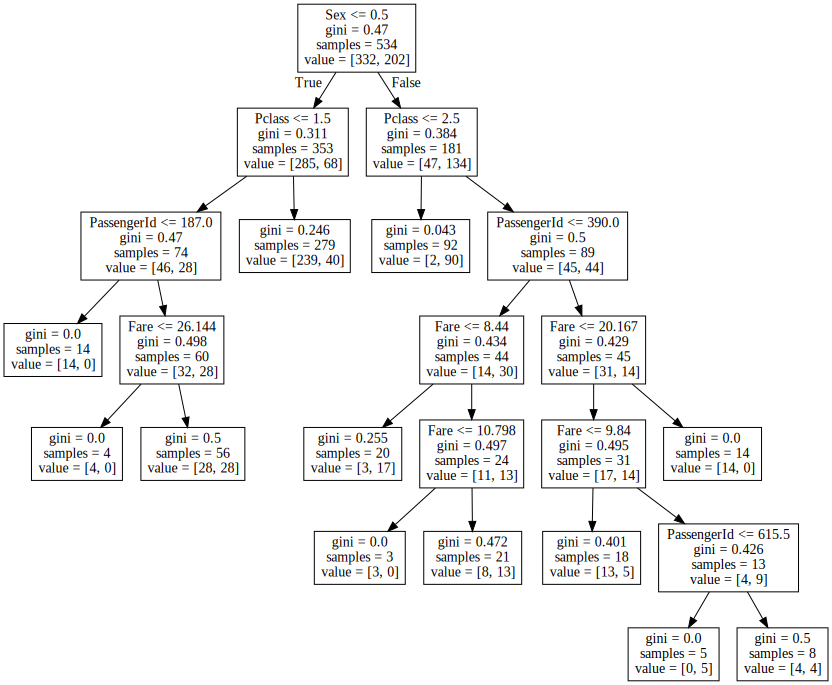

In [5]:
tree_ = DecisionTreeClassifier(criterion ="gini",splitter = "best", max_leaf_nodes = 12, min_samples_leaf = 3)
tree_.fit(x_train,y_train)
prdc = tree_.predict(x_test)
print("Accuracy : ", accuracy_score(y_test,prdc))
grph_export = tree.export_graphviz(tree_,feature_names = d.columns)
grph = graphviz.Source(grph_export)
grph.render("data")
grph

<font color = "red" size = 3> Comparison </font>

We can notice that the new accuracy of approximately <b> 0.793 </b> is higher than to the old accuracy of approximately <b> 0.776 </b> which means that the new Decision Tree with its parameters is <b> better at predicting new values of the Dataset </b> than the old Decision Tree.

In [10]:
rdt = RandomForestClassifier(n_estimators = 20)
rdt.fit(x_train,y_train)
prd = rdt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test,prd))

Accuracy :  0.7815126050420168


<font color="red" size = 3> Comparison </font>

We can notice that the accuracy of this Random Forest of 0.782 approximately is a bit higher than the accuracy of the old Decision Tree of 0.776 approximately but is still lower than the accuracy of the new Decision Tree of approximately 0.793. Which means this model based on Random Forest predicts correctly more new values of the dataset than the model based on the old Decision Tree but predicts less correctly than the model based on the new Decision Tree.